<a href="https://colab.research.google.com/github/StefanosGZ/Genetic-Algorithms/blob/main/First_tutorial(GA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pip install ypstruct
from ypstruct import structure

In [3]:
# Sphere Test Function
def sphere(x):
    return sum(x**2)

In [4]:
#Problem definition
problem = structure()
problem.costfunc = sphere
problem.nvar = 5
problem.varmin = [-10, -10, -1, -5, 4]
problem.varmax = [10, 10, 1, 5, 10]

In [5]:
#GA parameters
params = structure()
params.maxit = 100
params.npop = 50
params.pc = 1
params.gamma = 0.1
params.mutation_rate = 0.01
params.sigma = 0.1
params.beta = 1

In [6]:
def crossover(p1, p2, gamma=0.1):
  c1 = p1.deepcopy()
  c2 = p2.deepcopy()

  alpha = np.random.uniform(-gamma,1 + gamma ,*c1.position.shape)
  c1.position = alpha*p1.position + (1-alpha)*p2.position
  c2.position = alpha*p2.position + (1-alpha)*p1.position

  return c1, c2

In [7]:
def mutate(x, mutation_rate, sigma):
  y = x.deepcopy()
  flag = np.random.rand(*y.position.shape) <= mutation_rate
  ind = np.argwhere(flag)
  y.position[ind] += sigma * np.random.randn(*ind.shape)
  return y

In [8]:
def apply_bounds(x, varmin, varmax):
  x.position = np.maximum(x.position, varmin)
  x.position = np.minimum(x.position, varmax)
  return x

In [9]:
def roulette_wheel_selection(probabilities):
  cumulative_sum = np.cumsum(probabilities)
  r = sum(probabilities) * np.random.rand()
  ind = np.argwhere(r <= cumulative_sum)
  return ind[0][0]

In [10]:
from ypstruct import structure
import numpy as np
def run(problem, params):
  #Problem information
  costfunc = problem.costfunc
  nvar = problem.nvar
  varmin = problem.varmin
  varmax = problem.varmax

  #Parameters
  maxit = params.maxit
  npop = params.npop
  pc = params.pc
  nc = int(np.round(pc * npop/2)*2)
  gamma = params.gamma
  mutation_rate = params.mutation_rate
  sigma = params.sigma
  beta = params.beta

  #Empy Individual Template
  empty_individual = structure()
  empty_individual.position = None
  empty_individual.cost = None

  #BestSolution Found
  bestsol = empty_individual.deepcopy()
  bestsol.cost = np.inf

  #Initialized Population
  pop = empty_individual.repeat(npop)
  for i in range(npop):
    pop[i].position = np.random.uniform(varmin,varmax,nvar)
    pop[i].cost = costfunc(pop[i].position)
    if pop[i].cost < bestsol.cost:
      bestsol = pop[i].deepcopy()

  #Best Cost of Iterations
  bestcost = np.empty(maxit)

  #Main Loop
  for it in range(maxit):
    #Iteration loop
    popc = []

    costs = np.array([x.cost for x in pop])
    avg_cost = np.mean(costs)
    if avg_cost != 0:
      costs /= avg_cost
    probs = np.exp(-beta*costs)

    for _ in range(nc//2):
      #Population loop
      #Selection of parent randomly
      """q = np.random.permutation(npop)
      p1 = pop[q[0]]
      p2 = pop[q[1]]"""

      #Selection of Parents with Roulet Wheel Selection
      p1 = pop[roulette_wheel_selection(probs)]
      p2 = pop[roulette_wheel_selection(probs)]

      #Performing Crossover
      c1, c2 = crossover(p1, p2, gamma)

      #Performing Mutation
      c1 = mutate(c1, mutation_rate, sigma)
      c2 = mutate(c2, mutation_rate, sigma)

      #Applying Bounds
      apply_bounds(c1, varmin, varmax)
      apply_bounds(c2, varmin, varmax)

      #Evaluate First Offspring
      c1.cost = costfunc(c1.position)
      if c1.cost < bestsol.cost:
        bestsol = c1.deepcopy()

      #Evaluate Second Offspring
      c2.cost = costfunc(c2.position)
      if c2.cost < bestsol.cost:
        bestsol = c2.deepcopy()

      #Add offsprings to popc
      popc.append(c1)
      popc.append(c2)


    #Iteration loop
    #Merge, Sort and Select
    pop += popc
    pop = sorted(pop, key=lambda x: x.cost)
    pop = pop[0:npop]

    #Store Best Cost
    bestcost[it] = bestsol.cost

    #Show Iteration Information
    print(f"Iteration {it}: Best Cost = {bestcost[it]}")

  #Output
  out = structure()
  out.pop = pop
  out.bestsol = bestsol
  out.bestcost = bestcost
  return out

In [11]:
#Run GA
out = run(problem,params)

Iteration 0: Best Cost = 27.707425822398356
Iteration 1: Best Cost = 25.869378562400716
Iteration 2: Best Cost = 24.67830563296182
Iteration 3: Best Cost = 22.244946397977042
Iteration 4: Best Cost = 21.74753324718524
Iteration 5: Best Cost = 21.36174400412307
Iteration 6: Best Cost = 20.901950363879628
Iteration 7: Best Cost = 20.901950363879628
Iteration 8: Best Cost = 20.901950363879628
Iteration 9: Best Cost = 20.77635518620242
Iteration 10: Best Cost = 19.174985631844972
Iteration 11: Best Cost = 19.174985631844972
Iteration 12: Best Cost = 18.415694856484595
Iteration 13: Best Cost = 18.241907327291635
Iteration 14: Best Cost = 18.241907327291635
Iteration 15: Best Cost = 17.787489701206052
Iteration 16: Best Cost = 17.787489701206052
Iteration 17: Best Cost = 17.787489701206052
Iteration 18: Best Cost = 17.787489701206052
Iteration 19: Best Cost = 17.787489701206052
Iteration 20: Best Cost = 17.787489701206052
Iteration 21: Best Cost = 17.787489701206052
Iteration 22: Best Cost 

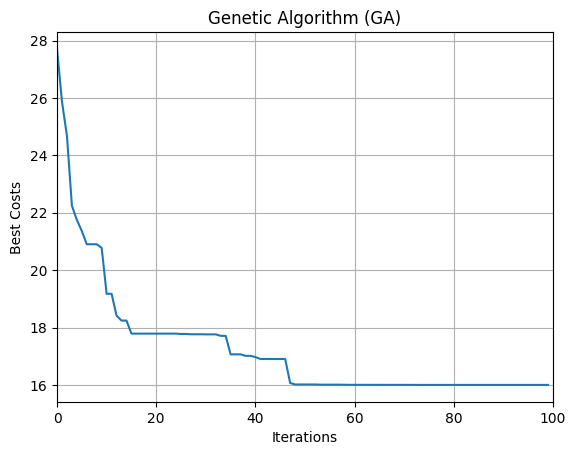

In [12]:
#Results
plt.plot(out.bestcost)
#plt.semilogy(out.bestcost)
plt.xlim(0,params.maxit)
plt.xlabel('Iterations')
plt.ylabel('Best Costs')
plt.title('Genetic Algorithm (GA)')
plt.grid(True)
plt.show()